In [1]:
import numpy as np
from numpy import inf

import astropy.constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt

import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

import subprocess
import os
import imageio

'''Note: I used copilot to refine the structure of my code's comments and figure displays.'''

"Note: I used copilot to refine the structure of my code's comments and figure displays."

# Part A:
Begin by looking up the coordinates and apparent size of the Messier 4 star cluster in your favorite astronomical object search tool (NED, Simbad, etc). Then use these coordinates to search the Gaia databaseLinks to an external site. and retrieve all stars that might be cluster members. To do this, you will need to create a GAIA login. You can generate the database search using their "Basic" search function which is limited to 2000 sources. There are many more cluster members than this, so you can generate and execute the full search using the "Show query" option and then remove the "TOP 2000" line at the start of the search. Lastly, retrieve the data in your favorite format.

 

Look through the database documentation to identify the columns that correspond to right ascension, declination, proper motion, parallax, Gaia G-band magnitude, and Gaia B-R color. Then use plots and selections on the star coordinates, proper motion, and/or parallax to identify candidate cluster members. Plot an HR diagram (GAIA B-R and absolute G-band magnitude) of the candidate cluster members and and explain how/whether this verifies the effectiveness of your selection. (Note: you can look up the cluster distance to compute absolute magnitudes from apparent)


In [2]:
messier_data_complete = pd.read_csv('messier4.csv') 
messier_data_complete

,designation,source_id,ra,dec,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,teff_gspphot,ag_gspphot
0,Gaia DR3 6045465540585768320,6045465540585768320,245.958622,-26.515028,0.136671,21.331287,-12.283603,-17.439522,20.625841,NaN,NaN,NaN,NaN
1,Gaia DR3 6045467739610012800,6045467739610012800,245.604966,-26.685620,-1.900190,10.041204,-5.036547,-8.686713,20.706110,1.363598,NaN,NaN,NaN
2,Gaia DR3 6045487015428127872,6045487015428127872,246.191052,-26.460914,NaN,NaN,NaN,NaN,21.011179,2.345734,NaN,NaN,NaN
3,Gaia DR3 6045488252378267008,6045488252378267008,246.188181,-26.428454,1.473566,4.505974,-0.402372,-4.487973,20.259554,1.024717,NaN,NaN,NaN
4,Gaia DR3 6045488252378350080,6045488252378350080,246.197567,-26.417141,NaN,NaN,NaN,NaN,20.926981,1.934355,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87392,Gaia DR3 6048520464918897920,6048520464918897920,245.842487,-26.032616,-2.469527,3.626111,0.912715,-3.509363,20.888662,0.918198,NaN,NaN,NaN
87393,Gaia DR3 6048520464918977920,6048520464918977920,245.847684,-26.031322,NaN,NaN,NaN,NaN,21.087750,1.250065,NaN,NaN,NaN
87394,Gaia DR3 6048520464919103872,6048520464919103872,245.850183,-26.028317,NaN,NaN,NaN,NaN,21.081291,NaN,NaN,NaN,NaN
87395,Gaia DR3 6048520464919313280,6048520464919313280,245.843739,-26.032001,NaN,NaN,NaN,NaN,21.154770,0.462135,NaN,NaN,NaN


In [3]:
messier_ra_complete = messier_data_complete['ra']
messier_dec_complete= messier_data_complete['dec']
messier_pm_complete= messier_data_complete['pm']
messier_pm_ra_complete = messier_data_complete['pmra']
messier_pm_dec_complete = messier_data_complete['pmdec']
messier_parallax_complete = messier_data_complete['parallax']
messier_gband_complete = messier_data_complete['phot_g_mean_mag']
messier_br_complete= messier_data_complete['bp_rp'] 

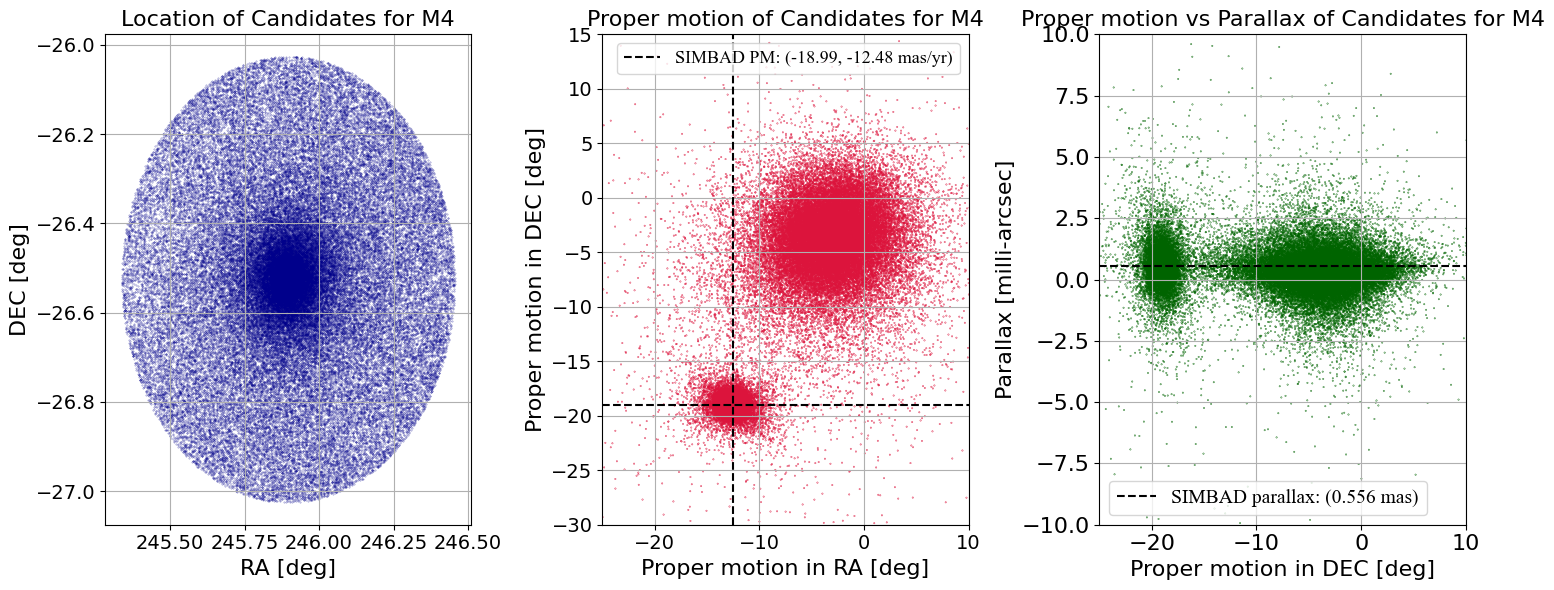

In [4]:
# Plotting RA vs DEC to get location of stars and Proper motion of RA and DEC of stars side by side

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
plt.rcParams['font.family'] = 'Times New Roman'

# Plotting RA vs DEC
axs[0].scatter(messier_ra_complete, messier_dec_complete, marker='o', facecolor='darkblue', s=0.1, alpha=0.5) #edgecolor='slategray'
axs[0].set_xlabel('RA [deg]', fontsize=16)
axs[0].set_ylabel('DEC [deg]', fontsize=16)
axs[0].set_title('Location of Candidates for M4', fontsize=16)
# axs[0].set_xlim(245.87, 245.922)
# axs[0].set_ylim(-26.547, -26.505)
axs[0].grid()
axs[0].tick_params(axis='both', which='major', labelsize=14)

# Plotting proper motion of RA and DEC
axs[1].scatter(messier_pm_ra_complete, messier_pm_dec_complete, marker='o', s=0.1, facecolor='none', edgecolor='crimson')
axs[1].axhline(-18.99, color='black', linestyle='--', label='SIMBAD PM: (-18.99, -12.48 mas/yr)')
axs[1].axvline(-12.48, color='black', linestyle='--')
axs[1].set_xlabel('Proper motion in RA [deg]', fontsize=16)
axs[1].set_ylabel('Proper motion in DEC [deg]', fontsize=16)
axs[1].set_title('Proper motion of Candidates for M4', fontsize=16)
axs[1].set_xlim(-25,10)
axs[1].set_ylim(-30,15)
axs[1].legend(loc='best', fontsize=13)
axs[1].grid()
axs[1].tick_params(axis='both', which='major', labelsize=14)

# Plotting proper motion of DEC and Parallax
axs[2].scatter(messier_pm_dec_complete, messier_parallax_complete, marker='o', s=0.1, facecolor='none', edgecolor='darkgreen')
axs[2].axhline(0.556, color='black', linestyle='--', label='SIMBAD parallax: (0.556 mas)')
axs[2].set_xlabel('Proper motion in DEC [deg]', fontsize=16)
axs[2].set_ylabel('Parallax [milli-arcsec]', fontsize=16)
axs[2].set_title('Proper motion vs Parallax of Candidates for M4', fontsize=16)
axs[2].set_xlim(-25,10)
axs[2].set_ylim(-10,10)
axs[2].legend(loc='best', fontsize=14)
axs[2].grid()
axs[2].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()

plt.savefig('mini_project_2_images/M4_candidates.png', dpi=300)
plt.show()



In [5]:
# Only keep the datapoints with a pm_ra and pm_dec within the range of the cluster nearest to (-12.48 -18.99)
# and parallax within the range of the cluster nearest to 0.556

messier_data = messier_data_complete[(messier_data_complete['pmra'] > -15) & (messier_data_complete['pmra'] < -10) & 
                            (messier_data_complete['pmdec'] > -22) & (messier_data_complete['pmdec'] < -15) & (messier_data_complete['parallax'] > -2) & 
                            (messier_data_complete['parallax'] < 2.5)]

messier_ra = messier_data['ra']
messier_dec = messier_data['dec']
messier_pm = messier_data['pm']
messier_pm_ra = messier_data['pmra']
messier_pm_dec = messier_data['pmdec']
messier_parallax = messier_data['parallax']
messier_gband = messier_data['phot_g_mean_mag']
messier_br = messier_data['bp_rp'] 

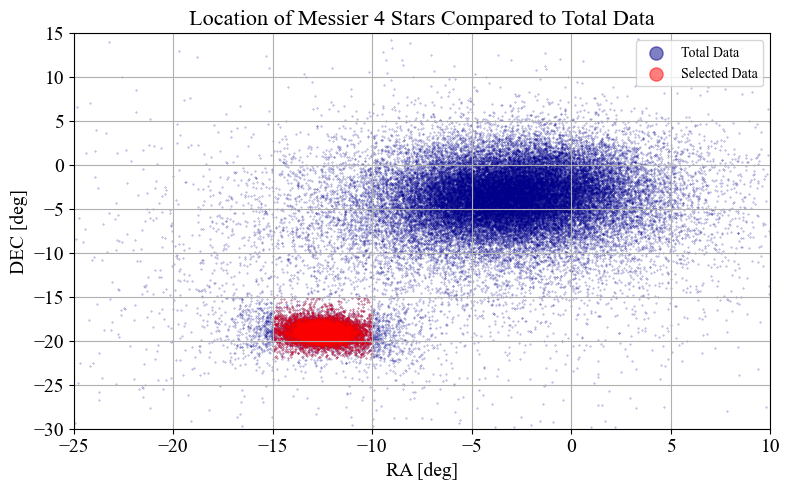

In [6]:
# Plotting the different cuts 

plt.figure(figsize=(8, 5))
plt.scatter(messier_pm_ra_complete, messier_pm_dec_complete, marker='o', facecolor='darkblue', s=0.1, alpha=0.5, label='Total Data')
plt.scatter(messier_pm_ra, messier_pm_dec, marker='o', facecolor='red', s=0.1, alpha=0.5, label='Selected Data')
plt.xlabel('RA [deg]', fontsize=14)
plt.ylabel('DEC [deg]', fontsize=14)
plt.title('Location of Messier 4 Stars Compared to Total Data', fontsize=16)
plt.xlim(-25,10)
plt.ylim(-30,15)
plt.legend(loc='best', markerscale=30)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('M4_selected_data.png', dpi=300)

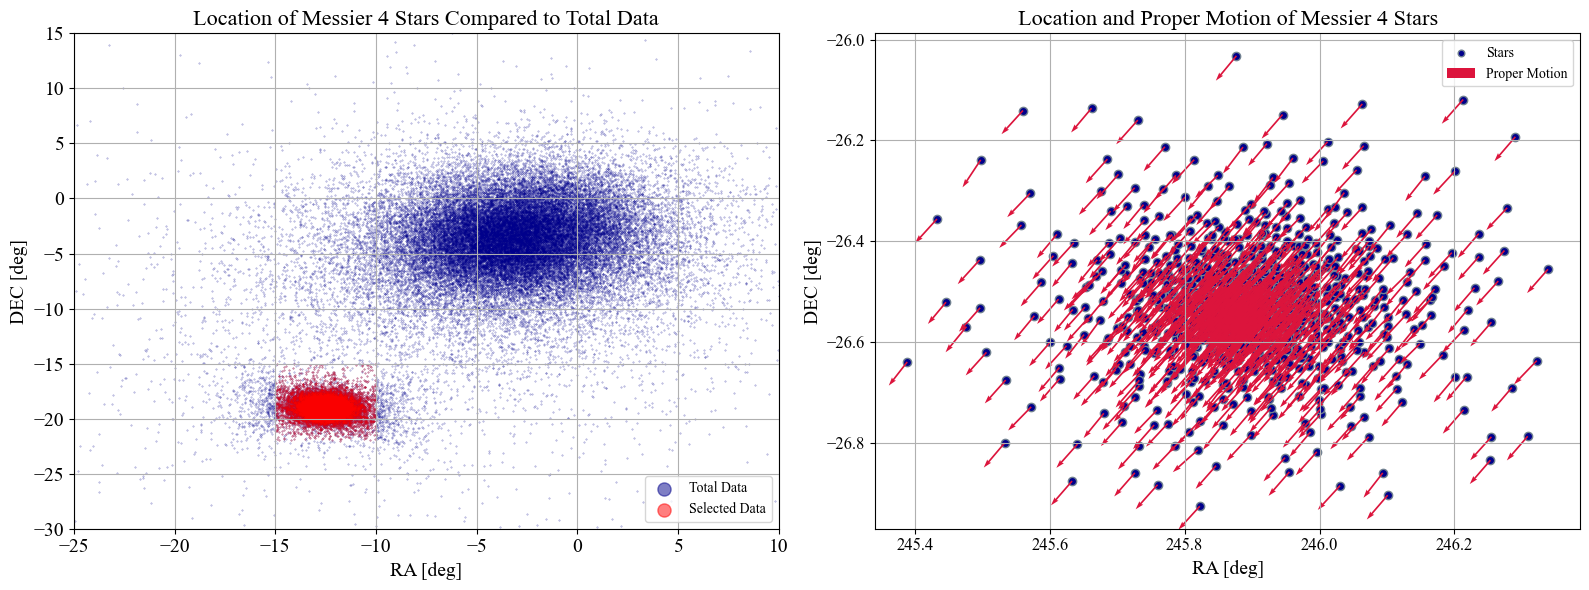

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# First plot
axs[0].scatter(messier_pm_ra_complete, messier_pm_dec_complete, marker='o', facecolor='darkblue', s=0.1, alpha=0.5, label='Total Data')
axs[0].scatter(messier_pm_ra, messier_pm_dec, marker='o', facecolor='red', s=0.1, alpha=0.5, label='Selected Data')
axs[0].set_xlabel('RA [deg]', fontsize=14)
axs[0].set_ylabel('DEC [deg]', fontsize=14)
axs[0].set_title('Location of Messier 4 Stars Compared to Total Data', fontsize=16)
axs[0].set_xlim(-25,10)
axs[0].set_ylim(-30,15)
axs[0].legend(loc='best', markerscale=30)
axs[0].grid()
axs[0].tick_params(axis='both', which='major', labelsize=14)

# Second plot
axs[1].scatter(messier_ra[::25], messier_dec[::25], marker='o', facecolor='darkblue', edgecolor='slategray', label='Stars')
axs[1].quiver(messier_ra[::25], messier_dec[::25], messier_pm_ra[::25], messier_pm_dec[::25], 
              scale_units='xy', angles='xy', scale=10**(2.6), color='crimson', label='Proper Motion')  # Increased scale to make arrows smaller
axs[1].set_xlabel('RA [deg]', fontsize=14)
axs[1].set_ylabel('DEC [deg]', fontsize=14)
axs[1].set_title('Location and Proper Motion of Messier 4 Stars', fontsize=16)
axs[1].grid()
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(loc='best', markerscale=0.8)

plt.tight_layout()
plt.savefig('M4_selected_data.png', dpi=300)
plt.show()


In [8]:
#Total number of M4 candidates
print('Total number of M4 candidates:', len(messier_data))

Total number of M4 candidates: 25626


In [9]:
# Computing the absolute magnitude 
# Using "M4 is roughly 1,720 parsecs" from https://hubblesite.org/contents/media/images/2003/19/1377-Image.html#:~:text=M4%20is%20roughly%205%2C600%20light,1%2C720%20parsecs)%20from%20the%20Earth.
d = 1720 
absolute_g = messier_gband - (5 * (np.log10(d) - 1))


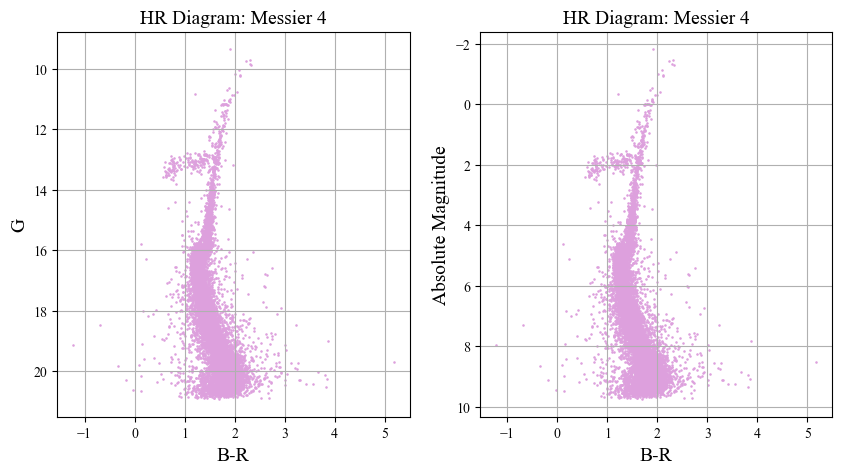

In [10]:
# Plotting HR-diagram 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(messier_br, messier_gband, s = 0.7, color='plum')
axs[0].set_xlabel('B-R', fontsize=14)
axs[0].set_ylabel('G', fontsize=14)
axs[0].set_title('HR Diagram: Messier 4', fontsize=14)
axs[0].invert_yaxis()
axs[0].grid()

axs[1].scatter(messier_br, absolute_g, s = 0.7, color='plum')
axs[1].set_xlabel('B-R', fontsize=14)
axs[1].set_ylabel('Absolute Magnitude', fontsize=14)
axs[1].set_title('HR Diagram: Messier 4', fontsize=14)
axs[1].invert_yaxis()
axs[1].grid()


plt.show()

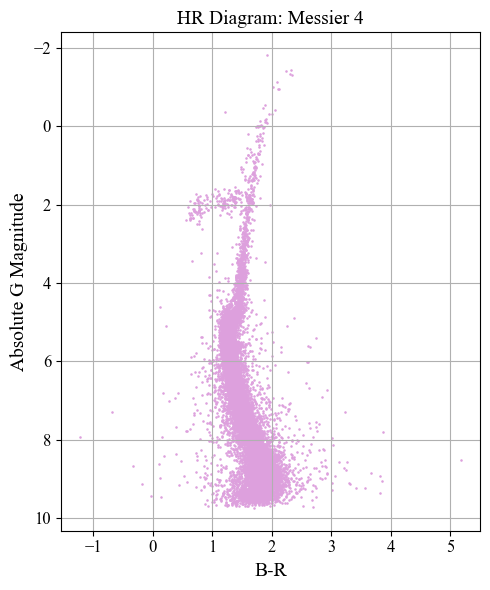

In [11]:
plt.figure(figsize=(5, 6))
plt.scatter(messier_br, absolute_g, s = 0.7, color='plum')
plt.xlabel('B-R', fontsize=14)
plt.ylabel('Absolute G Magnitude', fontsize=14)
plt.title('HR Diagram: Messier 4', fontsize=14)
plt.gca().invert_yaxis()
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig('mini_project_2_images/HR_M4.png', dpi=300)
plt.show()

# Part B:

Calculate the cluster center and then make HR diagrams separating stars in a handful of annuli centered on the cluster. Are there any trends in HR diagram features that change as a function of the projected distance from the cluster center? How can you explain this in terms of dynamical effects?

The cluster center is located at [245.90, -26.53] (ra,dec). The one from SIMBAD is 245:45:45.00 -26:31:32.7


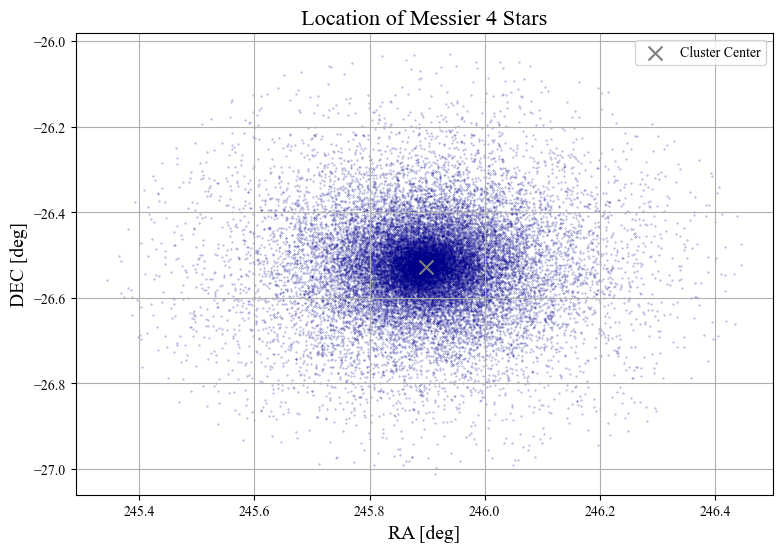

In [12]:
mean_ra = np.mean(messier_ra)
mean_dec = np.mean(messier_dec)

print(f'The cluster center is located at [{mean_ra:.2f}, {mean_dec:.2f}] (ra,dec). The one from SIMBAD is 245:45:45.00 -26:31:32.7')

# Plotting the center point on top of the data 
plt.figure(figsize=(9, 6))
plt.scatter(messier_ra, messier_dec, marker='o', facecolor='darkblue', s=0.1, alpha=0.5)
plt.scatter(mean_ra, mean_dec, marker='x', color='grey', s=100, label='Cluster Center')
plt.xlabel('RA [deg]', fontsize=14)
plt.ylabel('DEC [deg]', fontsize=14)
plt.title('Location of Messier 4 Stars', fontsize=16)
# plt.xlim(245.87, 245.922)
# plt.ylim(-26.547, -26.505)
plt.grid()
plt.legend()
plt.show()



In [13]:
arcmins = [6, 12, 18, 24, 30]
# Calculate the distance of each star from the cluster center

coordinates = SkyCoord(ra=np.array(messier_ra)*u.deg, dec=np.array(messier_dec)*u.deg, frame='icrs')
center = SkyCoord(ra=np.array(mean_ra)*u.deg, dec=np.array(mean_dec)*u.deg, frame='icrs')

distance = center.separation(coordinates).arcmin

first_anulus = coordinates[distance < arcmins[0]]
second_anulus = coordinates[(distance > arcmins[0]) & (distance < arcmins[1])]
third_anulus = coordinates[(distance > arcmins[1]) & (distance < arcmins[2])]
fourth_anulus = coordinates[(distance > arcmins[2]) & (distance < arcmins[3])]
fifth_anulus = coordinates[(distance > arcmins[3]) & (distance < arcmins[4])]

# print(f'Annuli boundaries:')
print(f'First annulus contains {len(first_anulus)} stars')
print(f'Second annulus contains {len(second_anulus)} stars')
print(f'Third annulus contains {len(third_anulus)} stars')
print(f'Fourth annulus contains {len(fourth_anulus)} stars')
print(f'Fifth annulus contains {len(fifth_anulus)} stars')


annuli = [first_anulus, second_anulus, third_anulus, fourth_anulus, fifth_anulus]

First annulus contains 13095 stars
Second annulus contains 7910 stars
Third annulus contains 3107 stars
Fourth annulus contains 1107 stars
Fifth annulus contains 407 stars


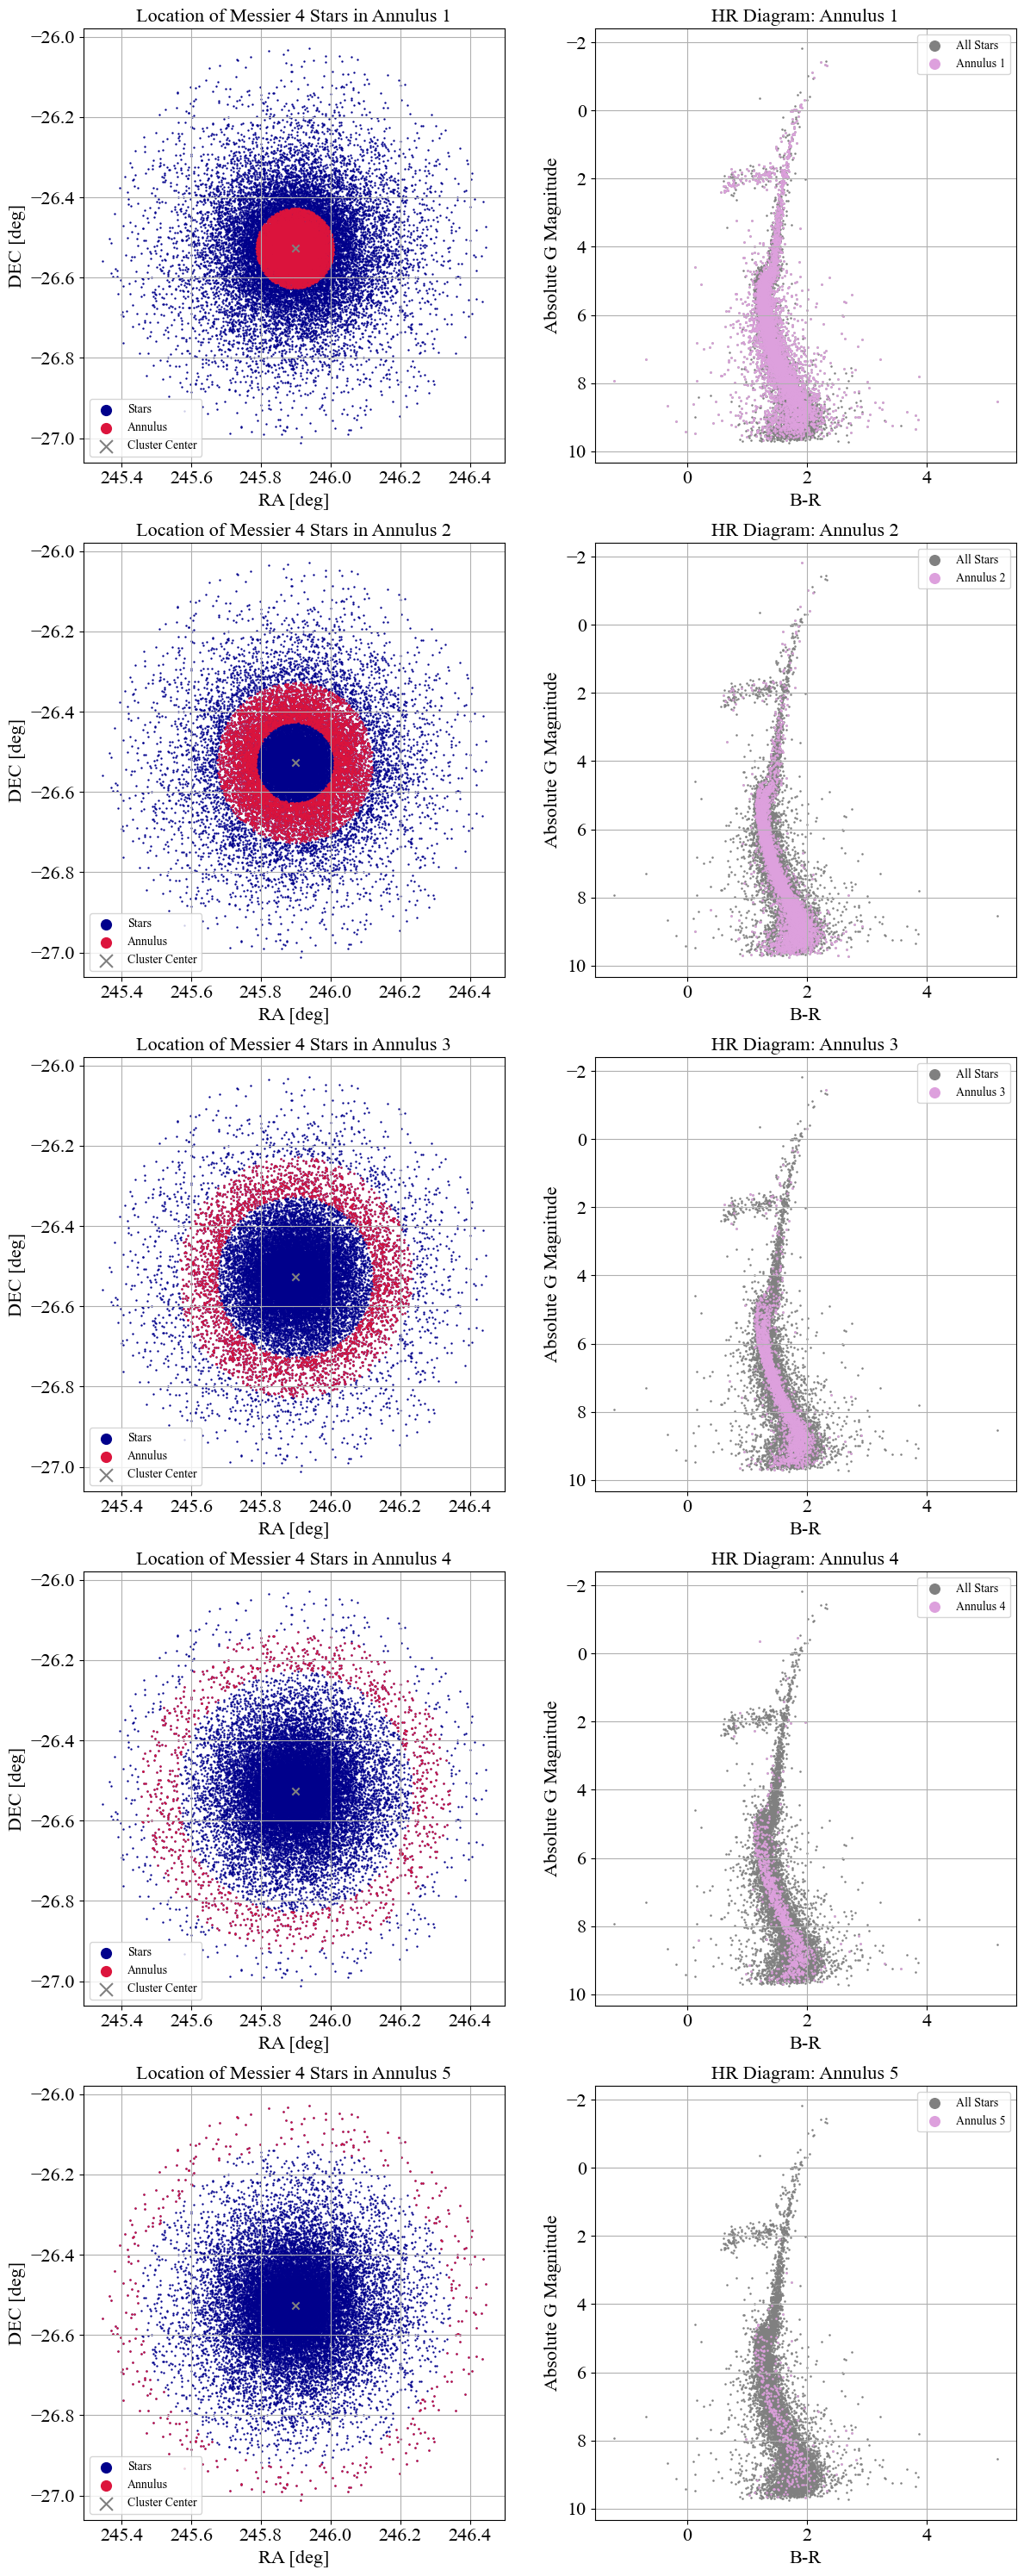

In [14]:
# Create a figure with a grid of subplots
fig, axs = plt.subplots(len(annuli), 2, figsize=(12, 6 * len(annuli)))
plt.rcParams['font.family'] = 'Times New Roman'

for i in range(len(annuli)):
    # Plotting the location of stars in the annulus
    axs[i, 0].scatter(messier_ra, messier_dec, marker='.', facecolor='darkblue', s=2, label='Stars')
    axs[i, 0].scatter(annuli[i].ra, annuli[i].dec, marker='.', facecolor='crimson', s=2, label='Annulus')
    axs[i, 0].scatter(mean_ra, mean_dec, marker='x', color='grey')
    axs[i, 0].scatter(mean_ra, mean_dec, marker='x', color='grey', s=0.8, label='Cluster Center')
    axs[i, 0].set_xlabel('RA [deg]', fontsize=16)
    axs[i, 0].set_ylabel('DEC [deg]', fontsize=16)
    axs[i, 0].set_title(f'Location of Messier 4 Stars in Annulus {i+1}', fontsize=16)
    axs[i, 0].tick_params(axis='both', which='major', labelsize=16)
    axs[i, 0].grid()
    axs[i, 0].legend(loc='best', markerscale=12)
    
    # Plotting the HR diagram for the annulus
    annulus_indices = (distance > arcmins[i-1]) & (distance < arcmins[i]) if i > 0 else (distance < arcmins[i])
    axs[i, 1].scatter(messier_br, absolute_g, s=0.7, color='grey', label='All Stars')
    axs[i, 1].scatter(messier_br[annulus_indices], absolute_g[annulus_indices], s=0.7, color='plum', label=f'Annulus {i+1}')
    axs[i, 1].set_xlabel('B-R', fontsize=16)
    axs[i, 1].set_ylabel('Absolute G Magnitude', fontsize=16)
    axs[i, 1].set_title(f'HR Diagram: Annulus {i+1}', fontsize=16)
    axs[i, 1].invert_yaxis()
    axs[i, 1].tick_params(axis='both', which='major', labelsize=16)
    axs[i, 1].grid()
    axs[i, 1].legend(loc='best', markerscale=10)

plt.tight_layout()
plt.savefig('mini_project_2_images/all_annuli_plots.png', dpi=300)
plt.show()

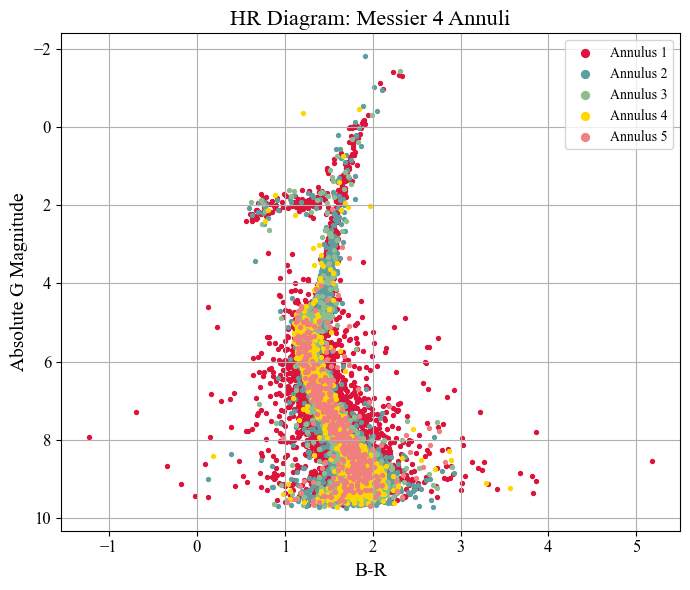

In [15]:
# Plotting HR-diagram for all annuli on top of each other
fig, ax = plt.subplots(figsize=(7, 6))

colors = ['crimson', 'cadetblue', 'darkseagreen', 'gold', 'lightcoral']
labels = [f'Annulus {i+1}' for i in range(len(annuli))]

for i in range(len(annuli)): #-1, -1, -1
    annulus_indices = (distance > arcmins[i-1]) & (distance < arcmins[i]) if i > 0 else (distance < arcmins[i])
    ax.scatter(messier_br[annulus_indices], absolute_g[annulus_indices], s=8, color=colors[i], label=labels[i])

ax.set_xlabel('B-R', fontsize=14)
ax.set_ylabel('Absolute G Magnitude', fontsize=14)
ax.set_title('HR Diagram: Messier 4 Annuli', fontsize=16)
ax.invert_yaxis()
ax.grid()
ax.legend(loc='best', markerscale=2)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.savefig('mini_project_2_images/all_annuli_HR.png', dpi=300)
plt.show()

# Part C
Using Philip Mocz's code and mediumLinks to an external site. post as a guide, write your own N-body simulator and set up a simulation for a mock star cluster. Then do one of the following (your choice based on interest):

Set up initial conditions so that the cluster is bound but not virialized, then estimate the time it takes for the system to become approximately virialized in the simulation. How does this compare with your expectations based on relevant timescales?
Implement a simulation with stars of different masses instead of all of them being the same mass. Does your simulation result in mass segregation? Why or why not.
This simulation code uses a leap-frog integration scheme. Replace it with a classic Eulerian integration scheme and compare energy conservation between the two. Explain any differences you see.
Explain why this type of direct N-body code is not used in cosmological simulations of galaxy evolution, but is sometimes used in star cluster simulations.

In [16]:
def getAcc( pos, mass, G, softening ):
	"""
    Calculate the acceleration on each particle due to Newton's Law 
	pos  is an N x 3 matrix of positions
	mass is an N x 1 vector of masses
	G is Newton's Gravitational constant
	softening is the softening length
	a is N x 3 matrix of accelerations
	"""
	# positions r = [x,y,z] for all particles
	x = pos[:,0:1]
	y = pos[:,1:2]
	z = pos[:,2:3]

	# matrix that stores all pairwise particle separations: r_j - r_i
	dx = x.T - x
	dy = y.T - y
	dz = z.T - z

	# matrix that stores 1/r^3 for all particle pairwise particle separations 
	inv_r3 = (dx**2 + dy**2 + dz**2 + softening**2)
	inv_r3[inv_r3>0] = inv_r3[inv_r3>0]**(-1.5)

	ax = G * (dx * inv_r3) @ mass
	ay = G * (dy * inv_r3) @ mass
	az = G * (dz * inv_r3) @ mass
	
	# pack together the acceleration components
	a = np.hstack((ax,ay,az))

	return a


In [17]:
def getEnergy( pos, vel, mass, G ):
	"""
	Get kinetic energy (KE) and potential energy (PE) of simulation
	pos is N x 3 matrix of positions
	vel is N x 3 matrix of velocities
	mass is an N x 1 vector of masses
	G is Newton's Gravitational constant
	KE is the kinetic energy of the system
	PE is the potential energy of the system
	"""
	# Kinetic Energy:
	KE = 0.5 * np.sum(np.sum( mass * vel**2 ))


	# Potential Energy:

	# positions r = [x,y,z] for all particles
	x = pos[:,0:1]
	y = pos[:,1:2]
	z = pos[:,2:3]

	# matrix that stores all pairwise particle separations: r_j - r_i
	dx = x.T - x
	dy = y.T - y
	dz = z.T - z

	# matrix that stores 1/r for all particle pairwise particle separations 
	inv_r = np.sqrt(dx**2 + dy**2 + dz**2)
	inv_r[inv_r>0] = 1.0/inv_r[inv_r>0]

	# sum over upper triangle, to count each interaction only once
	PE = G * np.sum(np.sum(np.triu(-(mass*mass.T)*inv_r,1)))
	
	return KE, PE

In [18]:
def save_frame(pos, i, method):
    """ Save the current frame as an image """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(pos[:, 0], pos[:, 1], s=10, color='blue')
    ax.set(xlim=(-2, 2), ylim=(-2, 2))
    ax.set_aspect('equal', 'box')
    ax.set_xticks([-2, -1, 0, 1, 2])
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.set_title(f'{method} Method - Frame {i}', fontsize=14)
    plt.savefig(f'frames/{method}_frame_{i:04d}.png')
    plt.close(fig)

In [19]:
def main_leapfrog():
    """ N-body simulation """
    
    # Simulation parameters
    N         = 100    # Number of particles
    t         = 0      # current time of the simulation
    tEnd      = 15.0   # time at which simulation ends
    dt        = 0.6   # timestep
    softening = 0.1    # softening length
    G         = 1.0    # Newton's Gravitational Constant

    
    # Generate Initial Conditions
    np.random.seed(17)            # set the random number generator seed
    
    mass = 20.0*np.ones((N,1))/N  # total mass of particles is 20
    pos  = np.random.randn(N,3) 
    vel  = np.random.randn(N,3) 

    # Convert to Center-of-Mass frame
    vel -= np.mean(mass * vel,0) / np.mean(mass)
    
    # calculate initial gravitational accelerations
    acc = getAcc(pos, mass, G, softening)
    
    # calculate initial energy of system
    KE, PE  = getEnergy(pos, vel, mass, G)
    
    # number of timesteps
    Nt = int(np.ceil(tEnd/dt))
    
    # save energies, particle orbits for plotting trails
    pos_save = np.zeros((N,3,Nt+1))
    pos_save[:,:,0] = pos
    KE_save = np.zeros(Nt+1)
    KE_save[0] = KE
    PE_save = np.zeros(Nt+1)
    PE_save[0] = PE
    t_all = np.arange(Nt+1)*dt
    
    # Simulation Main Loop
    for i in range(Nt):
        # (1/2) kick
        vel += acc * dt/2.0
        
        # drift
        pos += vel * dt
        
        # update accelerations
        acc = getAcc(pos, mass, G, softening)
        
        # kick
        vel += acc * dt/2.0
        
        # update time
        t += dt
        
        # Save frame
        save_frame(pos, i, 'leapfrog')

        # get energy of system
        KE, PE  = getEnergy(pos, vel, mass, G)
        
        # save energies, positions for plotting trail
        pos_save[:,:,i+1] = pos
        KE_save[i+1] = KE
        PE_save[i+1] = PE
    
    # Plot the final state
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    xx = pos_save[:,0,max(Nt-50,0):Nt+1]
    yy = pos_save[:,1,max(Nt-50,0):Nt+1]
    axs[0].scatter(xx, yy, s=1, color=[.7,.7,1])
    axs[0].scatter(pos[:,0], pos[:,1], s=10, color='blue')
    axs[0].set(xlim=(-2, 2), ylim=(-2, 2))
    axs[0].set_aspect('equal', 'box')
    axs[0].set_xticks([-2,-1,0,1,2])
    axs[0].set_yticks([-2,-1,0,1,2])
    axs[0].set_xlabel('x [pc]', fontsize=14)
    axs[0].set_ylabel('y [pc]', fontsize=14)
    axs[0].set_title('Final Position of Stars', fontsize=14)
    
    axs[1].plot(t_all, KE_save, color='red', label='KE')
    axs[1].plot(t_all, PE_save, color='blue', label='PE')
    axs[1].plot(t_all, KE_save+PE_save, color='black', label='Etot')
    axs[1].set(xlim=(0, tEnd), ylim=(np.min(PE_save)-20, np.max(KE_save)+20))
    axs[1].set_aspect(0.007)
    axs[1].set_xlabel('time', fontsize=14)
    axs[1].set_ylabel('energy', fontsize=14)
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

    # Save figure
    plt.savefig('mini_project_2_images/nbody_leapfrog.png', dpi=240)
    plt.show()
    
    return PE_save, KE_save, t_all

In [20]:
# Replacing with Eulerian method

def main_eulerian():
    """ N-body simulation using Eulerian integration scheme """
    
    # Simulation parameters
    N         = 100    # Number of particles
    t         = 0      # current time of the simulation
    tEnd      = 15.0   # time at which simulation ends
    dt        = 0.6   # timestep
    softening = 0.1    # softening length
    G         = 1.0    # Newton's Gravitational Constant


    # Generate Initial Conditions
    np.random.seed(17)            # set the random number generator seed
    
    mass = 20.0*np.ones((N,1))/N  # total mass of particles is 20
    pos  = np.random.randn(N,3) 
    vel  = np.random.randn(N,3) 

    # Convert to Center-of-Mass frame
    vel -= np.mean(mass * vel,0) / np.mean(mass)

    # calculate initial gravitational accelerations
    acc = getAcc(pos, mass, G, softening)
    
    # calculate initial energy of system
    KE, PE  = getEnergy(pos, vel, mass, G)
    
    # number of timesteps
    Nt = int(np.ceil(tEnd/dt))
    
    # save energies, particle orbits for plotting trails
    pos_save = np.zeros((N,3,Nt+1))
    pos_save[:,:,0] = pos
    KE_save = np.zeros(Nt+1)
    KE_save[0] = KE
    PE_save = np.zeros(Nt+1)
    PE_save[0] = PE
    t_all = np.arange(Nt+1)*dt
    
    # Simulation Main Loop
    for i in range(Nt):
        # Eulerian integration scheme
        vel += acc * dt
        pos += vel * dt
        
        # update accelerations
        acc = getAcc(pos, mass, G, softening)
        
        # update time
        t += dt

        # Save frame
        save_frame(pos, i, 'eulerian')
        
        # get energy of system
        KE, PE  = getEnergy(pos, vel, mass, G)
        
        # save energies, positions for plotting trail
        pos_save[:,:,i+1] = pos
        KE_save[i+1] = KE
        PE_save[i+1] = PE

    # Plot the final state
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    xx = pos_save[:,0,max(Nt-50,0):Nt+1]
    yy = pos_save[:,1,max(Nt-50,0):Nt+1]
    axs[0].scatter(xx, yy, s=1, color=[.7,.7,1])
    axs[0].scatter(pos[:,0], pos[:,1], s=10, color='blue')
    axs[0].set(xlim=(-2, 2), ylim=(-2, 2))
    axs[0].set_aspect('equal', 'box')
    axs[0].set_xticks([-2,-1,0,1,2])
    axs[0].set_yticks([-2,-1,0,1,2])
    axs[0].set_xlabel('x [pc]', fontsize=14)
    axs[0].set_ylabel('y [pc]', fontsize=14)
    axs[0].set_title('Final Position of Stars', fontsize=14)
    
    axs[1].plot(t_all, KE_save, color='red', label='KE')
    axs[1].plot(t_all, PE_save, color='blue', label='PE')
    axs[1].plot(t_all, KE_save+PE_save, color='black', label='Etot')
    axs[1].set(xlim=(0, tEnd), ylim=(np.min(PE_save)-20, np.max(KE_save)+20))
    axs[1].set_aspect(0.007)
    axs[1].set_xlabel('time', fontsize=14)
    axs[1].set_ylabel('energy', fontsize=14)
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    
    # Save figure
    plt.savefig('mini_project_2_images/nbody_eulerian.png', dpi=240)
    plt.show()
    
    return PE_save, KE_save, t_all


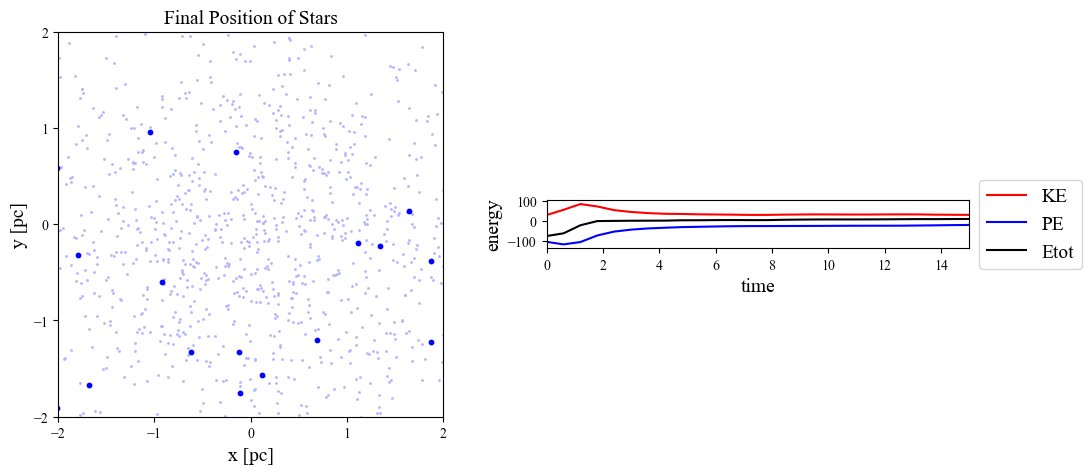

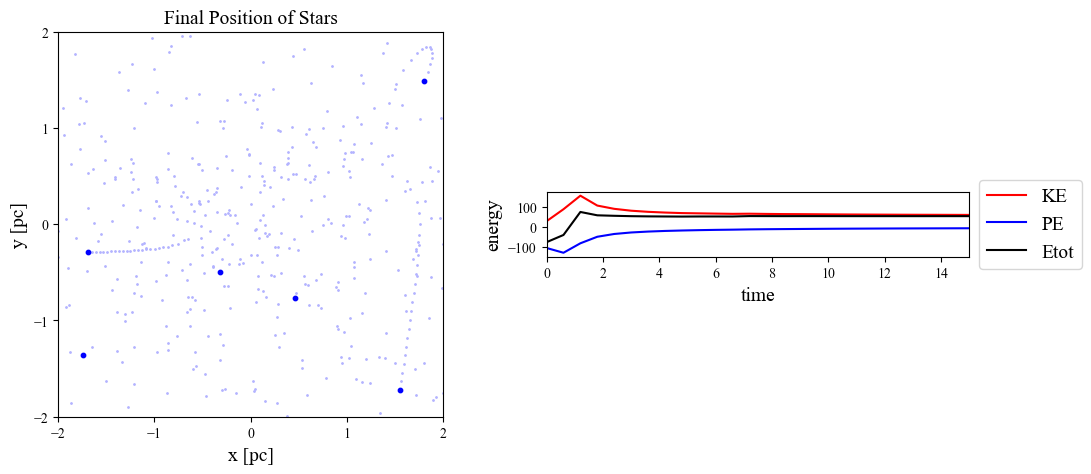

In [21]:
tEnd = 30.0

PE_leapfrog, KE_leapfrog, t_leapfrog = main_leapfrog()
PE_eulerian, KE_eulerian, t_eulerian = main_eulerian()


Mean total energy for Leapfrog method: -1.75
Mean total energy for Eulerian method: 47.04


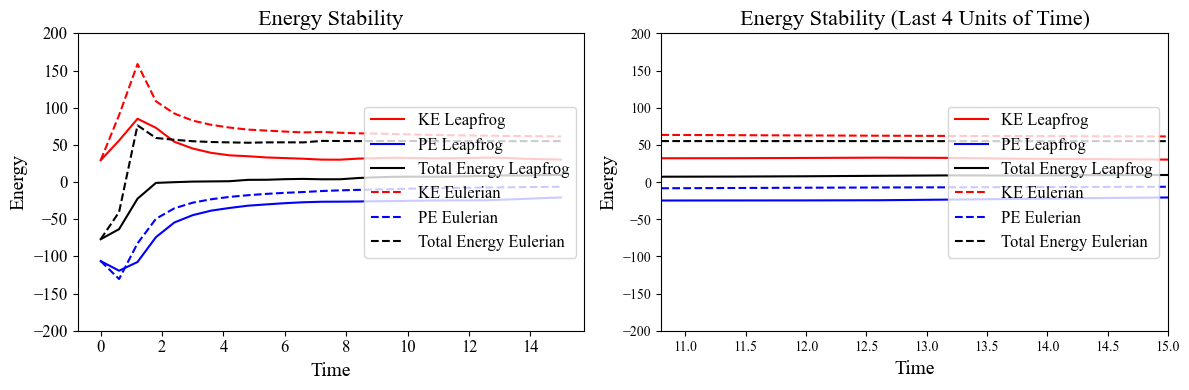

In [22]:
tot_energy_leap = PE_leapfrog + KE_leapfrog
mean_energy_leap = np.mean(tot_energy_leap)

tot_energy_euler = PE_eulerian + KE_eulerian
mean_energy_euler = np.mean(tot_energy_euler)

print(f'Mean total energy for Leapfrog method: {mean_energy_leap:.2f}')
print(f'Mean total energy for Eulerian method: {mean_energy_euler:.2f}')


# Comparing energy stability of the systems for both methods
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the energy stability for the entire time range
axs[0].plot(t_leapfrog, KE_leapfrog, color='red', label='KE Leapfrog')
axs[0].plot(t_leapfrog, PE_leapfrog, color='blue', label='PE Leapfrog')
axs[0].plot(t_leapfrog, tot_energy_leap, color='black', label='Total Energy Leapfrog')

axs[0].plot(t_eulerian, KE_eulerian, color='red', linestyle='--', label='KE Eulerian')
axs[0].plot(t_eulerian, PE_eulerian, color='blue',  linestyle='--', label='PE Eulerian')
axs[0].plot(t_eulerian, tot_energy_euler, color='black', linestyle='--', label='Total Energy Eulerian')
axs[0].set_ylim(-200, 200)
axs[0].set_xlabel('Time', fontsize=14)
axs[0].set_ylabel('Energy', fontsize=14)
axs[0].set_title('Energy Stability', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend(loc='right', fontsize=12)

# Plotting the energy stability for the last 4 units of time
axs[1].plot(t_leapfrog[-8:], KE_leapfrog[-8:], color='red', label='KE Leapfrog')
axs[1].plot(t_leapfrog[-8:], PE_leapfrog[-8:], color='blue', label='PE Leapfrog')
axs[1].plot(t_leapfrog[-8:], tot_energy_leap[-8:], color='black', label='Total Energy Leapfrog')

axs[1].plot(t_eulerian[-8:], KE_eulerian[-8:], color='red', linestyle='--', label='KE Eulerian')
axs[1].plot(t_eulerian[-8:], PE_eulerian[-8:], color='blue',  linestyle='--', label='PE Eulerian')
axs[1].plot(t_eulerian[-8:], tot_energy_euler[-8:], color='black', linestyle='--', label='Total Energy Eulerian')
axs[1].set_xlim(t_leapfrog[-8], t_leapfrog[-1])
axs[1].set_ylim(-200, 200)
axs[1].set_xlabel('Time', fontsize=14)
axs[1].set_ylabel('Energy', fontsize=14)
axs[1].set_title('Energy Stability (Last 4 Units of Time)', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(loc='right', fontsize=12)




plt.tight_layout()
plt.show()


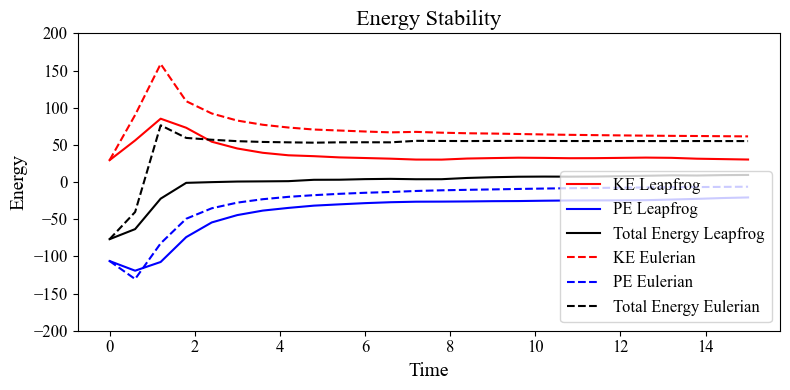

In [23]:

# Comparing energy stability of the systems for both methods
plt.figure(figsize=(8, 4))

# Plotting the energy stability for the entire time range
plt.plot(t_leapfrog, KE_leapfrog, color='red', label='KE Leapfrog')
plt.plot(t_leapfrog, PE_leapfrog, color='blue', label='PE Leapfrog')
plt.plot(t_leapfrog, tot_energy_leap, color='black', label='Total Energy Leapfrog')

plt.plot(t_eulerian, KE_eulerian, color='red', linestyle='--', label='KE Eulerian')
plt.plot(t_eulerian, PE_eulerian, color='blue', linestyle='--', label='PE Eulerian')
plt.plot(t_eulerian, tot_energy_euler, color='black', linestyle='--', label='Total Energy Eulerian')
plt.ylim(-200, 200)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy Stability', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.savefig('mini_project_2_images/energy_stability.png', dpi=300)

In [24]:
#initial total energy 
print(f'Initial total energy for Leapfrog method: {tot_energy_leap[0]:.2f}')
print(f'Final total energy for Leapfrog method: {tot_energy_leap[-1]:.2f}')
print(f'The total energy loss for leapfrog is {np.abs(tot_energy_leap[0] - tot_energy_leap[-1]):.2f}')

print(f'Initial total energy for Eulerian method: {tot_energy_euler[0]:.2f}')
print(f'Final total energy for Eulerian method: {tot_energy_euler[-1]:.2f}')
print(f'The total energy loss for Eulerian is {np.abs(tot_energy_euler[0] - tot_energy_euler[-1]):.2f}')

print(f'The ration of energy loss between the two methods is { np.abs(tot_energy_euler[-1] - tot_energy_euler[0])/np.abs(tot_energy_leap[-1] - tot_energy_leap[0]):.2f}')

Initial total energy for Leapfrog method: -76.89
Final total energy for Leapfrog method: 9.52
The total energy loss for leapfrog is 86.41
Initial total energy for Eulerian method: -76.89
Final total energy for Eulerian method: 55.08
The total energy loss for Eulerian is 131.97
The ration of energy loss between the two methods is 1.53


In [25]:
def create_movie(method, output_file):
    """ Create a movie from saved frames """
    frames_dir = 'frames'
    frames = sorted([f for f in os.listdir(frames_dir) if f.startswith(method)])
    # Ensure we are using the ffmpeg plugin for mp4 format
    with imageio.get_writer(output_file, mode='I', fps=10, format='ffmpeg') as writer:
        for frame in frames:
            image = imageio.imread(os.path.join(frames_dir, frame))
            writer.append_data(image)

# Create movies for both methods
create_movie('leapfrog', 'movies/leapfrog_simulation.mp4')
create_movie('eulerian', 'movies/eulerian_simulation.mp4')

/var/folders/6w/4l8xsqjn63b50789db29p6tm0000gr/T/ipykernel_60925/2222393617.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(frames_dir, frame))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 600) to (608, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
/var/folders/6w/4l8xsqjn63b50789db29p6tm0000gr/T/ipykernel_60925/2222393617.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio